In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import pickle
import datetime
import numpy as np
from cycler import cycler
import os.path
import modelresults as mres

In [4]:
def plotLossCdlc(fname,head,size,step,show):
    lossVal = mres.LossValues()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.x)
    lnt=lenVal
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y[0:lnt-1]))
    mx = max(np.array(lossVal.y[0:lnt-1]))
    rr = list(range(0,lnt,step))
    x = [ list(lossVal.x)[ix] for ix in rr ]
    y = [ lossVal.y[ix] for ix in rr ]
    mean = [ lossVal.mean[ix] for ix in rr ]
    if show == True:
        plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
        plt.plot(np.array(x), np.array(y))
        plt.plot(np.array(x), np.array(mean))
        plt.legend(['err','mean'], loc='upper right')
        plt.title(head)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        print("%d %d %d" % (len(lossVal.x),len(lossVal.y),len(lossVal.mean)))


cdlc-art-additive-minmax-mlp-simple-loss-values-RMSprop-0.001-0.5-500-10-2.bin


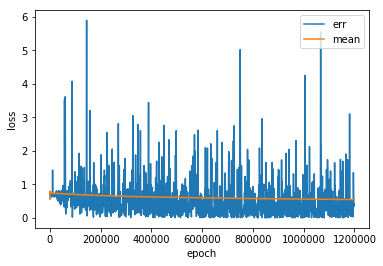

In [5]:
fname = 'cdlc-art-additive-minmax-mlp-simple-loss-values-RMSprop-0.001-0.5-500-10-2.bin'
head = ''
plotLossCdlc(fname,head,0,1000,True)

In [6]:
class LossValues(object):
    def __init__(self):
        self.x = []
        self.y1 = []
        self.y2 = []
        self.mean = []


In [7]:
def plotLossWord2Vec(fname,head,size,show):
    lossVal = LossValues()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.y1)
    lnt=lenVal
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y1[0:lnt-1]))
    mx = max(np.array(lossVal.y1[0:lnt-1]))
    if show == True:
        plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y1[0:lnt-1]))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y2[0:lnt-1]))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.mean[0:lnt-1]))
        plt.legend(['pri', 'sec', 'mean'], loc='upper right')
        plt.title(head)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        print("%d %d %d" % (len(lossVal.x),len(lossVal.y),len(lossVal.mean)))


../wordvectors/1000/additive-1000-loss-values-0.001-0.2-500-100.bin


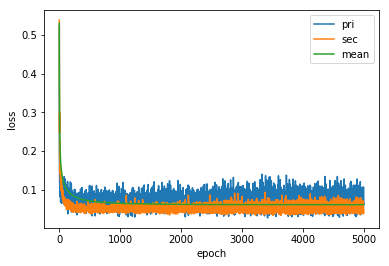

In [8]:
fname = '../wordvectors/1000/additive-1000-loss-values-0.001-0.2-500-100.bin'
head = ''
plotLossWord2Vec(fname,head,0,True)

In [9]:
fname = '../wordvectors/all/additive-all-loss-values-0.001-0.2-50-100-50.bin'
head = ''
plotLossWord2Vec(fname,head,5000,True)

../wordvectors/all/additive-all-loss-values-0.001-0.2-50-100-50.bin
file not found - ../wordvectors/all/additive-all-loss-values-0.001-0.2-50-100-50.bin 


In [ ]:
from numpy import random

In [ ]:
N=500
d=300
C=5
W=random.rand(C,d)
wordvectors_list = [random.rand(d,1) for i in range(N)]
wordvectors_one_matrix = random.rand(d,N)
%timeit [W.dot(wordvectors_list[i]) for i in range(N)]
%timeit W.dot(wordvectors_one_matrix)

In [ ]:
def plotStatsCdlc(fname,head,size,show):
    statsVal = {}
    statsValTrn = mres.ModelStats()
    statsValTst = mres.ModelStats()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    statsVal = pickle.load( open( fname, "rb" ) )
    statsValTrn = statsVal["train"]
    statsValTst = statsVal["test"]
    lnt = len(statsValTrn.epoch)
    if size != 0:
        lnt = size
    if show == True:
        plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
        plt.plot(np.array(statsValTrn.epoch[0:lnt-1]), np.array(statsValTrn.accuracy[0:lnt-1]))
        plt.plot(np.array(statsValTrn.epoch[0:lnt-1]), np.array(statsValTrn.errorRate[0:lnt-1]))
        plt.plot(np.array(statsValTrn.epoch[0:lnt-1]), np.array(statsValTrn.f1Score[0:lnt-1]))
        plt.legend(['acc', 'err', 'f1'], loc='upper left')
        plt.title("train " + head)
        plt.xlabel('epoch')
        plt.ylabel('value')
        plt.show()
        plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
        plt.plot(np.array(statsValTst.epoch[0:lnt-1]), np.array(statsValTst.accuracy[0:lnt-1]))
        plt.plot(np.array(statsValTst.epoch[0:lnt-1]), np.array(statsValTst.errorRate[0:lnt-1]))
        plt.plot(np.array(statsValTst.epoch[0:lnt-1]), np.array(statsValTst.f1Score[0:lnt-1]))
        plt.legend(['acc', 'err', 'f1'], loc='upper left')
        plt.title("test " + head)
        plt.xlabel('epoch')
        plt.ylabel('value')
        plt.show()


In [ ]:
fname ="cdlc-art-additive-add-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head = "additive-add"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-additive-add-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head = "additive-add"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-additive-tanh-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head =  "additive-tanh"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-additive-tanh-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head =  "additive-tanh"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-add-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head =  "tanh-add"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-add-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head =  "tanh-add"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-tanh-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head = "tanh-tanh"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-tanh-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head = "tanh-tanh"
plotStatsCdlc(fname,head,0,True)




In [ ]:
fname ="cdlc-art-additive-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head = "additive-minmax"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
head = "tanh-minmax"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-additive-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head = "additive-minmax"
plotStatsCdlc(fname,head,0,True)

fname ="cdlc-art-tanh-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
head = "tanh-minmax"
plotStatsCdlc(fname,head,0,True)


In [ ]:
def stats(fname):
    def posList(lst,val):
        return [i for i in range(len(lst)) if lst[i] == val]
    def epoch(inpList1,inpList2):
        maxVal = max(inpList2)
        return [maxVal,inpList1.epoch[inpList2.index(maxVal)]]
    statsVal = pickle.load( open( fname, "rb" ) )
    statsValTrn = statsVal["train"]
    statsValTst = statsVal["test"]
    
    maxTrn = epoch(statsValTrn,statsValTrn.accuracy)
    maxTst = epoch(statsValTst,statsValTst.accuracy)
    accList = {"train max" : maxTrn[0],"train mean" : np.mean(statsValTrn.accuracy),"train epoch" : maxTrn[1],"posList":posList(statsValTrn.accuracy,maxTrn[0]),
               "test max" : maxTst[0],"test mean" : np.mean(statsValTst.accuracy),"test epoch" : maxTst[1],"posList" : posList(statsValTst.accuracy,maxTst[0])}

    maxTrn = epoch(statsValTrn,statsValTrn.errorRate)
    maxTst = epoch(statsValTst,statsValTst.errorRate)
    errList = {"train max" : maxTrn[0],"train mean" : np.mean(statsValTrn.errorRate),"train epoch" : maxTrn[1],"posList":posList(statsValTrn.accuracy,maxTrn[0]),
               "test max" : maxTst[0],"test mean" : np.mean(statsValTrn.errorRate),"test epoch" : maxTst[1],"posList" : posList(statsValTst.accuracy,maxTst[0])}

    maxTrn = epoch(statsValTrn,statsValTrn.f1Score)
    maxTst = epoch(statsValTst,statsValTst.f1Score)
    f1List = {"train max" : maxTrn[0],"train mean" : np.mean(statsValTrn.f1Score),"train epoch" : maxTrn[1],"posList":posList(statsValTrn.accuracy,maxTrn[0]),
               "test max" : maxTst[0],"test mean" : np.mean(statsValTrn.f1Score),"test epoch" : maxTst[1],"posList" : posList(statsValTst.accuracy,maxTst[0])}

    return {"Accuracy":accList,"Error Rate":errList,"F1 Score": f1List}


In [ ]:
fname ="cdlc-art-additive-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
additive_minmax_2 = stats(fname)

fname ="cdlc-art-additive-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
additive_minmax_3 = stats(fname)

fname ="cdlc-art-tanh-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-2.bin"
tanh_minmax_2 = stats(fname)

fname ="cdlc-art-tanh-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-5000-3.bin"
tanh_minmax_3 = stats(fname)


In [ ]:
print("Cdlc Art Additive-Minmax (2 Hidden)")
print("            train            test")
print("            mean  - max      mean -  max")
print("accuracy    %.3f - %.3f     %.3f - %.3f" % (additive_minmax_2["Accuracy"]["train mean"],additive_minmax_2["Accuracy"]["train max"],additive_minmax_2["Accuracy"]["test mean"],additive_minmax_2["Accuracy"]["test max"]))
print("error rate  %.3f - %.3f     %.3f - %.3f" % (additive_minmax_2["Error Rate"]["train mean"],additive_minmax_2["Error Rate"]["train max"],additive_minmax_2["Error Rate"]["test mean"],additive_minmax_2["Error Rate"]["test max"]))
print("f1 score    %.3f - %.3f     %.3f - %.3f" % (additive_minmax_2["F1 Score"]["train mean"],additive_minmax_2["F1 Score"]["train max"],additive_minmax_2["F1 Score"]["test mean"],additive_minmax_2["F1 Score"]["test max"]))
print("\n")
print("Cdlc Art Additive-Minmax (3 Hidden)")
print("            mean  - max      mean -  max")
print("accuracy    %.3f - %.3f     %.3f - %.3f" % (additive_minmax_3["Accuracy"]["train mean"],additive_minmax_3["Accuracy"]["train max"],additive_minmax_3["Accuracy"]["test mean"],additive_minmax_3["Accuracy"]["test max"]))
print("error rate  %.3f - %.3f     %.3f - %.3f" % (additive_minmax_3["Error Rate"]["train mean"],additive_minmax_3["Error Rate"]["train max"],additive_minmax_3["Error Rate"]["test mean"],additive_minmax_3["Error Rate"]["test max"]))
print("f1 score    %.3f - %.3f     %.3f - %.3f" % (additive_minmax_3["F1 Score"]["train mean"],additive_minmax_3["F1 Score"]["train max"],additive_minmax_3["F1 Score"]["test mean"],additive_minmax_3["F1 Score"]["test max"]))
print("\n\n")
print("Cdlc Art Tanh-Minmax (2 Hidden)")
print("            mean  - max      mean -  max")
print("accuracy    %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_2["Accuracy"]["train mean"],tanh_minmax_2["Accuracy"]["train max"],tanh_minmax_2["Accuracy"]["test mean"],tanh_minmax_2["Accuracy"]["test max"]))
print("error rate  %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_2["Error Rate"]["train mean"],tanh_minmax_2["Error Rate"]["train max"],tanh_minmax_2["Error Rate"]["test mean"],tanh_minmax_2["Error Rate"]["test max"]))
print("f1 score    %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_2["F1 Score"]["train mean"],tanh_minmax_2["F1 Score"]["train max"],tanh_minmax_2["F1 Score"]["test mean"],tanh_minmax_2["F1 Score"]["test max"]))
print("\n")
print("Cdlc Art Tanh-Minmax (3 Hidden)")
print("            mean  - max      mean -  max")
print("accuracy    %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_3["Accuracy"]["train mean"],tanh_minmax_3["Accuracy"]["train max"],tanh_minmax_3["Accuracy"]["test mean"],tanh_minmax_3["Accuracy"]["test max"]))
print("error rate  %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_3["Error Rate"]["train mean"],tanh_minmax_3["Error Rate"]["train max"],tanh_minmax_3["Error Rate"]["test mean"],tanh_minmax_3["Error Rate"]["test max"]))
print("f1 score    %.3f - %.3f     %.3f - %.3f" % (tanh_minmax_3["F1 Score"]["train mean"],tanh_minmax_3["F1 Score"]["train max"],tanh_minmax_3["F1 Score"]["test mean"],tanh_minmax_3["F1 Score"]["test max"]))






In [16]:
def strFoldStats(fname):
    statsVal = pickle.load( open(fname, "rb" ) )
    fold = len(statsVal['train'].fold)
    vals = statsVal['train']
    strTrain = []
    strTrain.append("Train precision:%.3f recall:%.3f f1-score:%.3f " % \
      (sum(vals.precision)/fold,sum(vals.recall)/fold,sum(vals.f1Score)/fold))
    strTrain.append("Train score:%.3f accuracy:%.3f error-rate:%.3f " % \
        (sum(vals.score)/fold,sum(vals.accuracy)/fold,sum(vals.errorRate)/fold))
    fold = len(statsVal['test'].fold)
    vals = statsVal['test']
    strTest = []
    strTest.append("Test precision:%.3f recall:%.3f f1-score:%.3f " % \
      (sum(vals.precision)/fold,sum(vals.recall)/fold,sum(vals.f1Score)/fold))
    strTest.append("Test score:%.3f accuracy:%.3f error-rate:%.3f " % \
        (sum(vals.score)/fold,sum(vals.accuracy)/fold,sum(vals.errorRate)/fold))
    return strTrain,strTest

In [17]:
print("%s\n%s" % (strFoldStats("cdlc-art-additive-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-500-10-2.bin")))

['Train precision:0.793 recall:0.698 f1-score:0.685 ', 'Train score:0.722 accuracy:0.722 error-rate:0.277 ']
['Test precision:0.545 recall:0.685 f1-score:0.603 ', 'Test score:0.540 accuracy:0.540 error-rate:0.460 ']


In [18]:
print("%s\n%s" % (strFoldStats("cdlc-art-tanh-minmax-mlp-simple-stat-values-RMSprop-0.001-0.5-500-10-2.bin")))

['Train precision:0.795 recall:0.830 f1-score:0.763 ', 'Train score:0.772 accuracy:0.772 error-rate:0.228 ']
['Test precision:0.506 recall:0.852 f1-score:0.631 ', 'Test score:0.494 accuracy:0.494 error-rate:0.506 ']


In [61]:
print(list(range(50,100)))

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
